In [102]:
import requests
from requests.exceptions import RequestException
import json
import pymongo
import time
import re
import bs4
import threading
import numpy as np
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
from  matplotlib import cm
import seaborn as sns
import copy

In [177]:
if __name__=='__main__':
    #login in the DB mongo
    client = pymongo.MongoClient(host='localhost', port=27017)
    db = client.review
    collection = db.rawdata
    collection_new = db.deal

## 合并前绘图

In [178]:
collection.count()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


13384

In [179]:
collection.count()
arr = collection.find()
for item in arr:
    if len(item["pstcmt"]) == 1033:
        print(item)

{'_id': ObjectId('5f0dae0f7554df8ce67dddbf'), 'ClassAlias': 'MED130003.07', 'ClassName': '组织胚胎学B', 'TeachaerName': '周国民', 'pstcmt': ['满意 ', '满意 ', '老师对待教学认真负责，语言生动，条理清晰，举例充分恰当，对待学生严格要求，能够鼓励学生踊跃发言，使课堂气氛比较积极热烈。 ', '老师讲的比较容易理解 ', '好 ', '无 ', '上课生动有趣 ', '知识量大，老师负责 ', '老师们很有心，热情，讲的很仔细 ', '满意 ', '满意 ', '老师对待教学认真负责，语言生动，条理清晰，举例充分恰当，对待学生严格要求，能够鼓励学生踊跃发言，使课堂气氛比较积极热烈。 ', '老师讲的比较容易理解 ', '好 ', '无 ', '上课生动有趣 ', '知识量大，老师负责 ', '老师们很有心，热情，讲的很仔细 ', '好 ', '老师很棒 ', '满意 ', '实验课不错 ', '啥都好 ', '不错不错 ', '不错不错 ', '老师教的很好 ', '无 ', '清晰 ', '清晰 ', '满意 ', '满意 ', '满意 ', '满意 ', '教师的教学风格、教师的水平、课程内容、授课形式 ', '内容范围广，中英文结合教学。 ', '陈红、刘琼老师大赞！！！！！ ', '陈红、刘琼老师大赞！！！！！ ', '满意 ', '试验和理论分开这种方式感觉很好 ', '暂无 ', '挺好的 ', '好好好好好好 ', '好好好好好好 ', '满意 ', '满意 ', '老师对待教学认真负责，语言生动，条理清晰，举例充分恰当，对待学生严格要求，能够鼓励学生踊跃发言，使课堂气氛比较积极热烈。 ', '老师讲的比较容易理解 ', '好 ', '无 ', '上课生动有趣 ', '知识量大，老师负责 ', '老师们很有心，热情，讲的很仔细 ', '好 ', '老师很棒 ', '满意 ', '实验课不错 ', '啥都好 ', '不错不错 ', '不错不错 ', '老师教的很好 ', '无 ', '清晰 ', '清晰 ', '教师的教学风格、教师的水平、课程内容、授课形式 ', '内容范围广，中英文结合教学。 ', '教师的教学风格、教师的

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


In [186]:
collection.count()
arr = collection.find()


pst_sum = 0
pst_len = {}
ngt_len = {}
pst_hist = []
ngt_hist = []
for item in arr:
    temp = len(item["pstcmt"])
    pst_sum += temp
    pst_hist.append(temp)
    if str(temp) not in pst_len:
        pst_len[str(temp)] = 0
    pst_len[str(temp)] += 1
    
    temp = len(item["ngtcmt"])
    ngt_hist.append(temp)
    if str(temp) not in ngt_len:
        ngt_len[str(temp)] = 0
    ngt_len[str(temp)] += 1
print(pst_len)
print(ngt_len)
print(pst_sum)

{'4': 1013, '11': 818, '2': 2135, '10': 517, '1': 2264, '7': 631, '3': 1397, '9': 427, '5': 911, '22': 10, '8': 539, '6': 688, '12': 922, '0': 109, '14': 184, '13': 431, '18': 15, '16': 41, '15': 73, '17': 16, '19': 13, '21': 10, '20': 15, '32': 9, '25': 6, '59': 1, '30': 6, '122': 1, '236': 1, '66': 2, '465': 1, '35': 3, '33': 2, '26': 9, '38': 10, '24': 6, '49': 2, '36': 8, '46': 2, '95': 3, '34': 8, '45': 3, '58': 2, '42': 5, '88': 3, '37': 1, '63': 2, '109': 4, '57': 6, '62': 2, '52': 3, '28': 5, '61': 1, '220': 2, '55': 1, '434': 1, '54': 3, '103': 1, '73': 1, '148': 1, '100': 1, '293': 1, '188': 1, '105': 1, '56': 2, '44': 4, '113': 1, '67': 1, '212': 2, '110': 2, '130': 1, '219': 1, '420': 1, '70': 2, '261': 1, '513': 1, '48': 4, '69': 1, '153': 1, '305': 1, '605': 1, '39': 2, '27': 1, '90': 1, '40': 1, '60': 1, '91': 1, '74': 2, '47': 2, '43': 2, '68': 2, '50': 2, '185': 1, '373': 1, '83': 1, '78': 1, '167': 1, '325': 1, '89': 1, '64': 1, '65': 2, '131': 1, '259': 1, '514': 1, 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


In [181]:
a = []
b = []
for i in range(25):
    if str(i) in pst_len:
        a.append(pst_len[str(i)])
    else:
        a.append(0)
for i in range(25):
    if str(i) in ngt_len:
        b.append(ngt_len[str(i)])
    else:
        b.append(0)

In [182]:
a,b

([109,
  2264,
  2135,
  1397,
  1013,
  911,
  688,
  631,
  539,
  427,
  517,
  818,
  922,
  431,
  184,
  73,
  41,
  16,
  15,
  13,
  15,
  10,
  10,
  0,
  6],
 [308,
  3496,
  2204,
  1359,
  1189,
  807,
  768,
  843,
  1089,
  712,
  263,
  66,
  37,
  3,
  16,
  3,
  10,
  4,
  19,
  7,
  10,
  1,
  12,
  1,
  11])

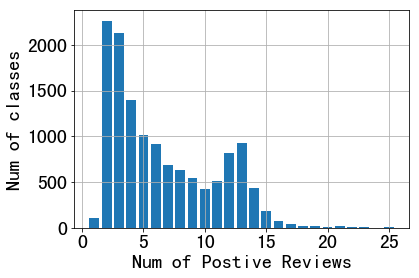

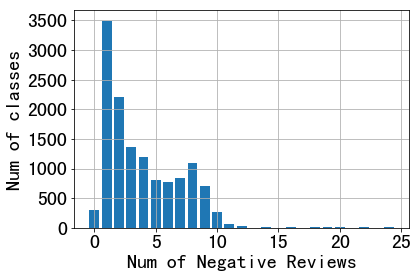

In [183]:
plt.bar(np.linspace(1,len(a),len(a)), a)
plt.xlabel('Num of Postive Reviews',fontsize=20)
plt.ylabel('Num of classes',fontsize=20)
plt.grid(axis='both')
# legend = plt.legend(loc="upper left",fontsize=20) # label的位置在左上，没有这句会找不到label去哪了
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


plt.bar(range(0, len(b)), b)
plt.xlabel('Num of Negative Reviews',fontsize=20)
plt.ylabel('Num of classes',fontsize=20)
plt.grid(axis='both')
# legend = plt.legend(loc="upper left",fontsize=20) # label的位置在左上，没有这句会找不到label去哪了
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

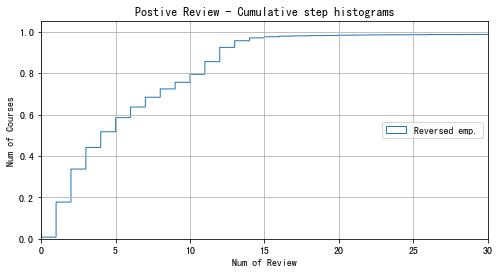

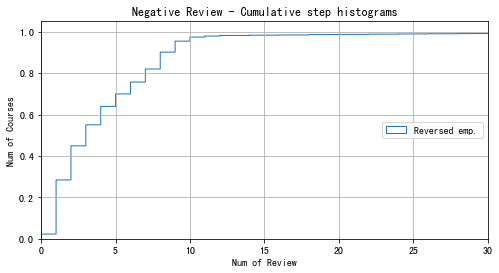

In [184]:
fig, ax = plt.subplots(figsize=(8, 4))
bins = 1000000
# Overlay a reversed cumulative histogram.
ax.hist(pst_hist, bins=bins, density=True, histtype='step', cumulative=True,
        label='Reversed emp.')



plt.xlim(0, 30)
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Postive Review - Cumulative step histograms')
ax.set_xlabel('Num of Review')
ax.set_ylabel('Num of Courses')

plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
bins = 1000000
# Overlay a reversed cumulative histogram.
ax.hist(ngt_hist, bins=bins, density=True, histtype='step', cumulative=True,
        label='Reversed emp.')



plt.xlim(0, 30)
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Negative Review - Cumulative step histograms')
ax.set_xlabel('Num of Review')
ax.set_ylabel('Num of Courses')

plt.show()



## 合并

In [192]:
def combine():
    # # 合并相同的课程（老师相同）
    arr = collection.find()
    for item in arr:
        new_item = copy.deepcopy(item)
        idd = new_item['_id']
        new_item.pop('_id')
        fd = {}
        fd['ClassName'] = new_item['ClassName']
        fd['TeachaerName'] = new_item['TeachaerName']
        for item1 in collection.find(fd):
            if item1['_id'] == idd:
                continue
            new_item["pstcmt"] += item1["pstcmt"]
            new_item["ngtcmt"] += item1["ngtcmt"]
        flag = 0
        for item1 in collection_new.find(fd):
            flag = 1
        if flag == 0:
            collection_new.insert_one(new_item)

    # # 合并相同的课程（老师相同）
#     collection_new = db.deal
#     arr = collection_new.find()
#     for item in arr:
#         idd = item['_id']
#         fd = {}
#         fd['ClassName'] = item['ClassName']
#         fd['TeachaerName'] = item['TeachaerName']
#         for item1 in collection_new.find(fd):
#             if item1['_id'] == idd:
#                 continue
#             collection_new.delete_one(item1)

In [196]:
# combine()

## 合并后绘图

In [200]:
collection_new.count()
arr = collection_new.find()

pst_sum = 0
ngt_sum = 0
pst_len = {}
ngt_len = {}
pst_hist = []
ngt_hist = []
for item in arr:
    temp = len(item["pstcmt"])
    pst_sum += temp
    pst_hist.append(temp)
    if str(temp) not in pst_len:
        pst_len[str(temp)] = 0
    pst_len[str(temp)] += 1
    
    temp = len(item["ngtcmt"])
    ngt_sum += temp
    ngt_hist.append(temp)
    if str(temp) not in ngt_len:
        ngt_len[str(temp)] = 0
    ngt_len[str(temp)] += 1
print(pst_len)
print(ngt_len)
print(pst_sum)
print(ngt_sum)

{'4': 392, '75': 7, '6': 270, '34': 39, '1': 159, '12': 125, '48': 22, '77': 2, '2': 469, '3': 101, '9': 45, '72': 8, '5': 68, '98': 4, '46': 24, '15': 19, '27': 19, '16': 100, '24': 115, '71': 6, '74': 7, '29': 15, '28': 76, '8': 196, '53': 3, '91': 2, '47': 5, '54': 12, '39': 3, '79': 1, '30': 47, '18': 92, '44': 22, '69': 3, '65': 6, '33': 8, '35': 8, '76': 2, '80': 10, '45': 8, '37': 13, '84': 5, '25': 15, '19': 15, '81': 4, '174': 1, '1208': 1, '68': 12, '40': 33, '17': 16, '63': 7, '14': 107, '10': 175, '13': 30, '78': 7, '424': 1, '99': 1, '31': 14, '162': 3, '11': 40, '780': 1, '22': 90, '100': 2, '101': 1, '60': 15, '55': 3, '824': 1, '420': 1, '118': 2, '7': 54, '94': 4, '158': 1, '235': 1, '20': 91, '124': 3, '57': 2, '38': 43, '0': 27, '148': 1, '58': 11, '144': 2, '170': 1, '26': 66, '56': 17, '61': 2, '178': 1, '43': 2, '21': 7, '92': 8, '52': 19, '36': 36, '82': 5, '32': 26, '95': 1, '141': 1, '83': 1, '23': 12, '114': 3, '295': 1, '135': 2, '50': 22, '112': 2, '169': 2,

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


In [204]:
a = []
b = []
for i in range(40):
    if str(i) in pst_len:
        a.append(pst_len[str(i)])
    else:
        a.append(0)
for i in range(40):
    if str(i) in ngt_len:
        b.append(ngt_len[str(i)])
    else:
        b.append(0)

In [205]:
a

[27,
 159,
 469,
 101,
 392,
 68,
 270,
 54,
 196,
 45,
 175,
 40,
 125,
 30,
 107,
 19,
 100,
 16,
 92,
 15,
 91,
 7,
 90,
 12,
 115,
 15,
 66,
 19,
 76,
 15,
 47,
 14,
 26,
 8,
 39,
 8,
 36,
 13,
 43,
 3]

In [206]:
b

[70,
 238,
 658,
 103,
 394,
 85,
 272,
 65,
 203,
 60,
 149,
 23,
 139,
 25,
 138,
 11,
 129,
 15,
 109,
 17,
 84,
 19,
 62,
 22,
 60,
 14,
 52,
 11,
 49,
 7,
 34,
 5,
 36,
 9,
 43,
 3,
 28,
 7,
 19,
 6]

In [209]:
c = np.array(a) + np.array(b)
c

array([  97,  397, 1127,  204,  786,  153,  542,  119,  399,  105,  324,
         63,  264,   55,  245,   30,  229,   31,  201,   32,  175,   26,
        152,   34,  175,   29,  118,   30,  125,   22,   81,   19,   62,
         17,   82,   11,   64,   20,   62,    9])

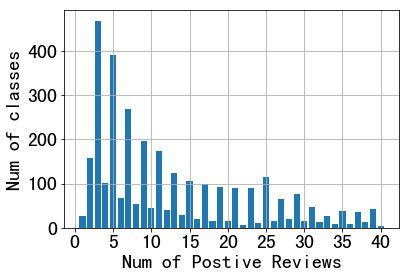

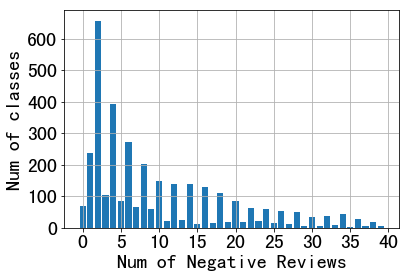

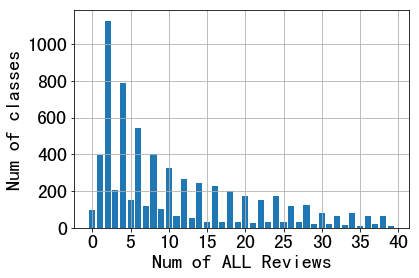

In [211]:
plt.bar(np.linspace(1,len(a),len(a)), a)
plt.xlabel('Num of Postive Reviews',fontsize=20)
plt.ylabel('Num of classes',fontsize=20)
plt.grid(axis='both')
# legend = plt.legend(loc="upper left",fontsize=20) # label的位置在左上，没有这句会找不到label去哪了
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


plt.bar(range(0, len(b)), b)
plt.xlabel('Num of Negative Reviews',fontsize=20)
plt.ylabel('Num of classes',fontsize=20)
plt.grid(axis='both')
# legend = plt.legend(loc="upper left",fontsize=20) # label的位置在左上，没有这句会找不到label去哪了
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

plt.bar(range(0, len(c)), c)
plt.xlabel('Num of ALL Reviews',fontsize=20)
plt.ylabel('Num of classes',fontsize=20)
plt.grid(axis='both')
# legend = plt.legend(loc="upper left",fontsize=20) # label的位置在左上，没有这句会找不到label去哪了
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

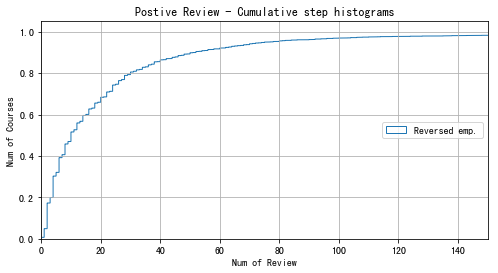

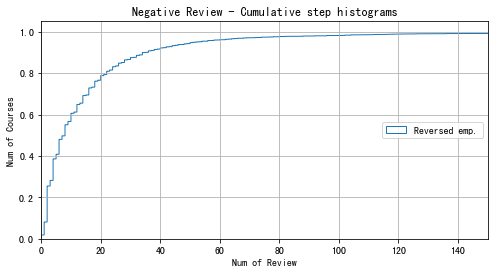

In [216]:
fig, ax = plt.subplots(figsize=(8, 4))
bins = 1000000
# Overlay a reversed cumulative histogram.
ax.hist(pst_hist, bins=bins, density=True, histtype='step', cumulative=True,
        label='Reversed emp.')



plt.xlim(0, 150)
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Postive Review - Cumulative step histograms')
ax.set_xlabel('Num of Review')
ax.set_ylabel('Num of Courses')

plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
bins = 1000000
# Overlay a reversed cumulative histogram.
ax.hist(ngt_hist, bins=bins, density=True, histtype='step', cumulative=True,
        label='Reversed emp.')



plt.xlim(0, 150)
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Negative Review - Cumulative step histograms')
ax.set_xlabel('Num of Review')
ax.set_ylabel('Num of Courses')

plt.show()



In [43]:
a = [1,2]
b = copy.deepcopy(a)
a = [1,3]
a,b

([1, 3], [1, 2])

In [157]:
a = {'1':1}
a.pop('1')
a

{}

### 评论长度分布

In [217]:
collection_new.count()
arr = collection_new.find()

pst_len_hist = []
ngt_len_hist = []

for item in arr:
    for _ in item["pstcmt"]:
        pst_len_hist.append(len(_))
    for _ in item["ngtcmt"]:
        ngt_len_hist.append(len(_))
        
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


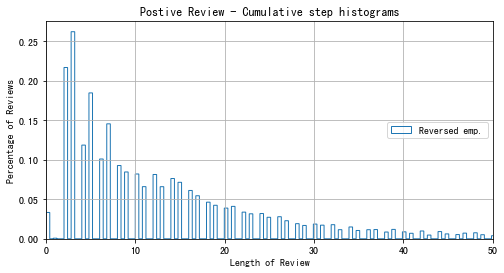

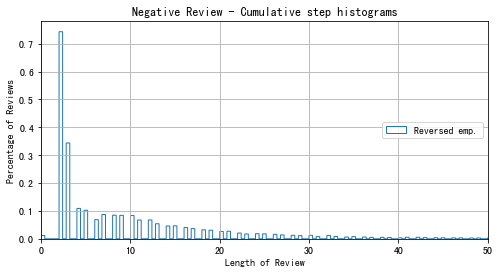

In [229]:
fig, ax = plt.subplots(figsize=(8, 4))
bins = 1000
# Overlay a reversed cumulative histogram.
ax.hist(pst_len_hist, bins=bins, density=True, histtype='step',
        label='Reversed emp.')



plt.xlim(0, 50)
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Postive Review - Cumulative step histograms')
ax.set_xlabel('Length of Review')
ax.set_ylabel('Percentage of Reviews')

plt.show()


fig, ax = plt.subplots(figsize=(8, 4))
bins = 1000
# Overlay a reversed cumulative histogram.
ax.hist(ngt_len_hist, bins=bins, density=True, histtype='step',
        label='Reversed emp.')



plt.xlim(0, 50)
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Negative Review - Cumulative step histograms')
ax.set_xlabel('Length of Review')
ax.set_ylabel('Percentage of Reviews')

plt.show()